#import e pip install



Sezione per installare le pip che servono per il progetto

In [27]:
!pip install numpy
!pip install pandas
!pip install kagglehub[pandas-datasets]
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install tensorflow
!pip install keras
!pip install scipy

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Sezione degli import

In [28]:
import os
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    mean_squared_error,
    roc_curve,
    auc
)
import scipy.stats as st
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import random


SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Variabili usate

in caso di errore modificare i path

In [29]:
# drive_folder = "/content/drive/MyDrive/ML_25_26"
# dataset_folder = "/kaggle/input/red-and-white-wine-quality"
# single_file = "Red and White Wine Quality.csv"
# file_path = os.path.join(drive_folder, single_file)

Carichiamo il drive

In [30]:
# drive.mount('/content/drive')
# os.makedirs(drive_folder, exist_ok=True)

Scarichiamo il dataset

In [31]:
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "alirezamehrad/red-and-white-wine-quality",
  "Red and White Wine Quality.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# df.to_csv(file_path, index=False)

/tmp/ipython-input-1594906317.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'red-and-white-wine-quality' dataset.


Controlliamo se esiste il dataset

In [32]:
# df = pd.read_csv(file_path)
# files = os.listdir(drive_folder)
# print("Contenuto della cartella:", files)


#Analisi Esplorativa dei dati (EDA)

In [33]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [34]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white

In [35]:
print(df.shape)
print(df.dtypes)

(6497, 13)
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object


In [36]:
# duplicated values
df.duplicated().sum()

np.int64(1177)

In [37]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [38]:
# missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [39]:
# we focus on type target, so remove quality
df = df.drop(['quality'], axis=1)

# checking imbalanced data
class_balance = df['type'].value_counts(normalize=True).to_frame('Proportion')
print(class_balance)

       Proportion
type             
white    0.744549
red      0.255451


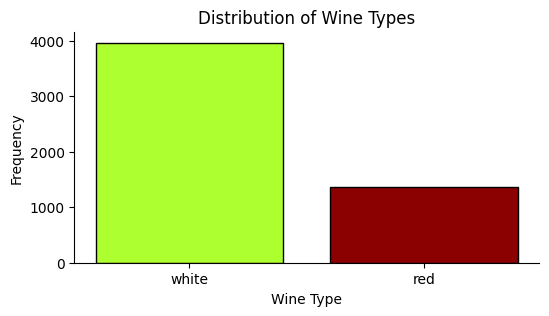

In [40]:
class_counts = df['type'].value_counts()
plt.figure(figsize=(6, 3))
colors = ['greenyellow', 'darkred']

plt.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black')
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [41]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241  
std       0.160379     0.149743     1.185933  
min       2.720000     0.220000     8.000000  
25%       3.110000     0.430000     9.500000  
50%       3.210000     0.510000    10.400000  
75%       3.330000     0.600000    11.400000  
max       4.010000     2.000000    14.900000

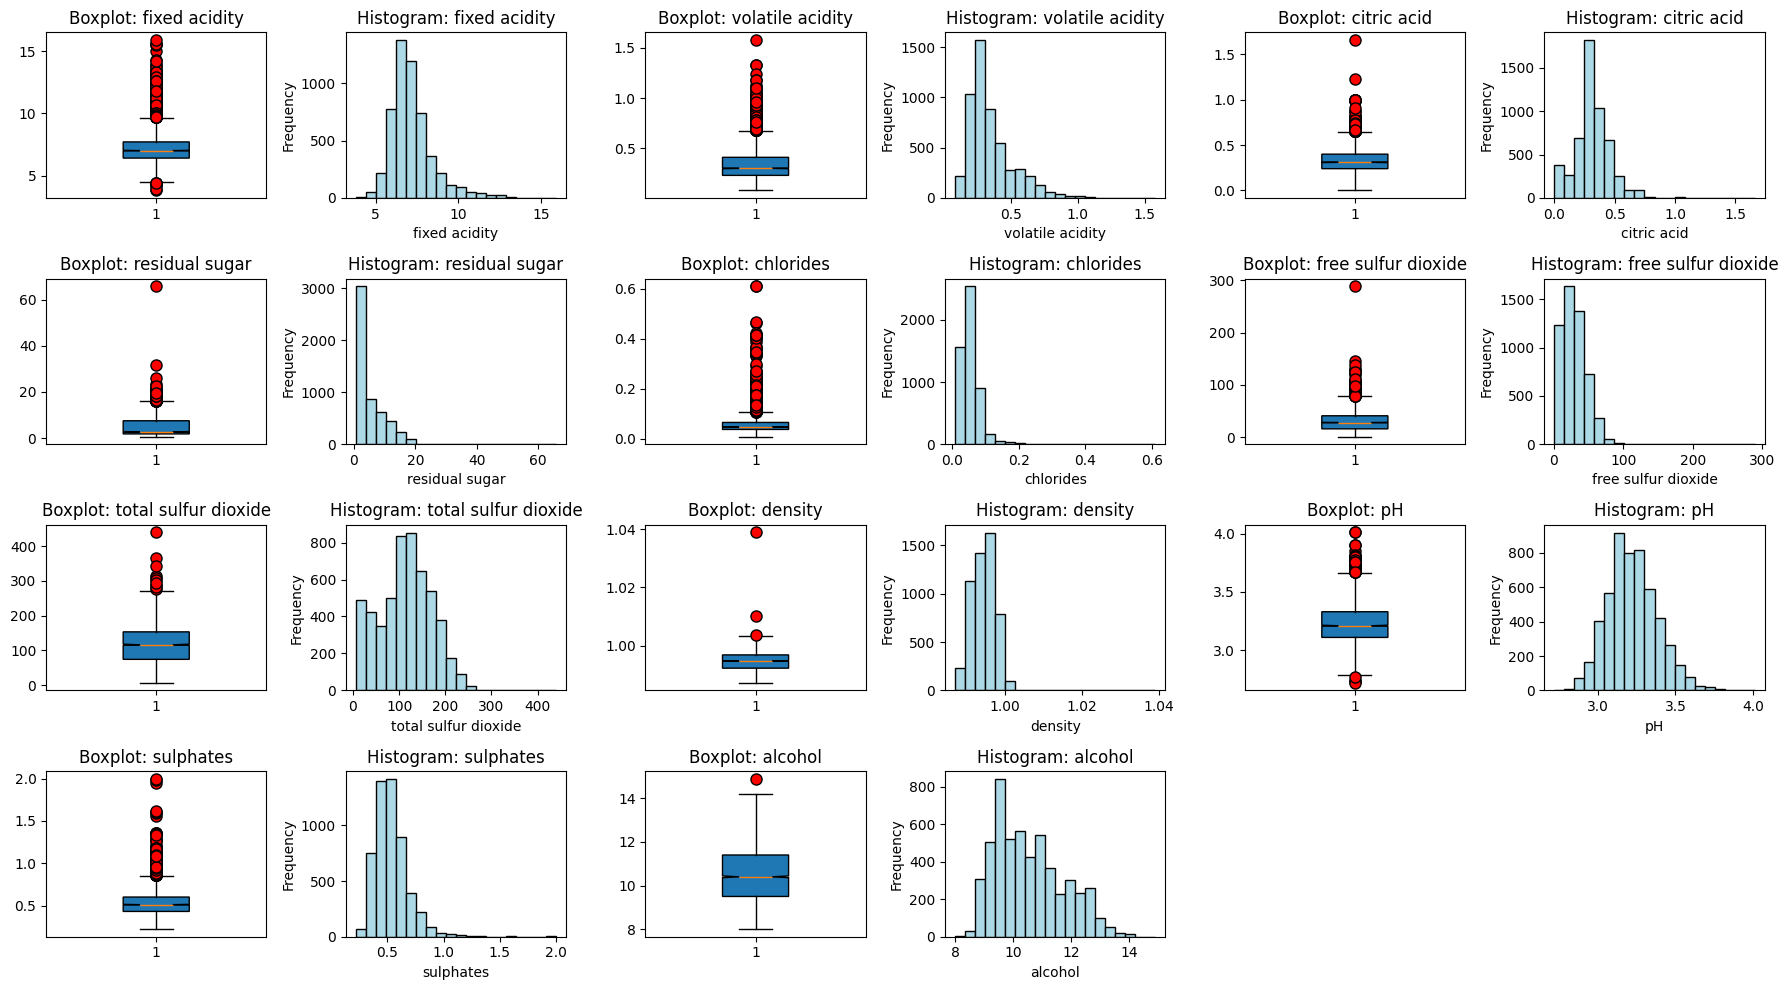

In [42]:
df1 = df.drop(['type'], axis=1)
cols = df1.columns
n = len(cols)

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i * 2].boxplot(df1[col], notch=True, patch_artist=True,
                        flierprops=dict(marker='o', markersize=8, markerfacecolor='red'),
                        widths=0.3)
    axes[i * 2].set_title(f'Boxplot: {col}')

    axes[i * 2 + 1].hist(df1[col], bins=20, color='lightblue', edgecolor='black')
    axes[i * 2 + 1].set_title(f'Histogram: {col}')
    axes[i * 2 + 1].set_xlabel(col)
    axes[i * 2 + 1].set_ylabel('Frequency')

for j in range(i*2 + 2, len(axes)):
   fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

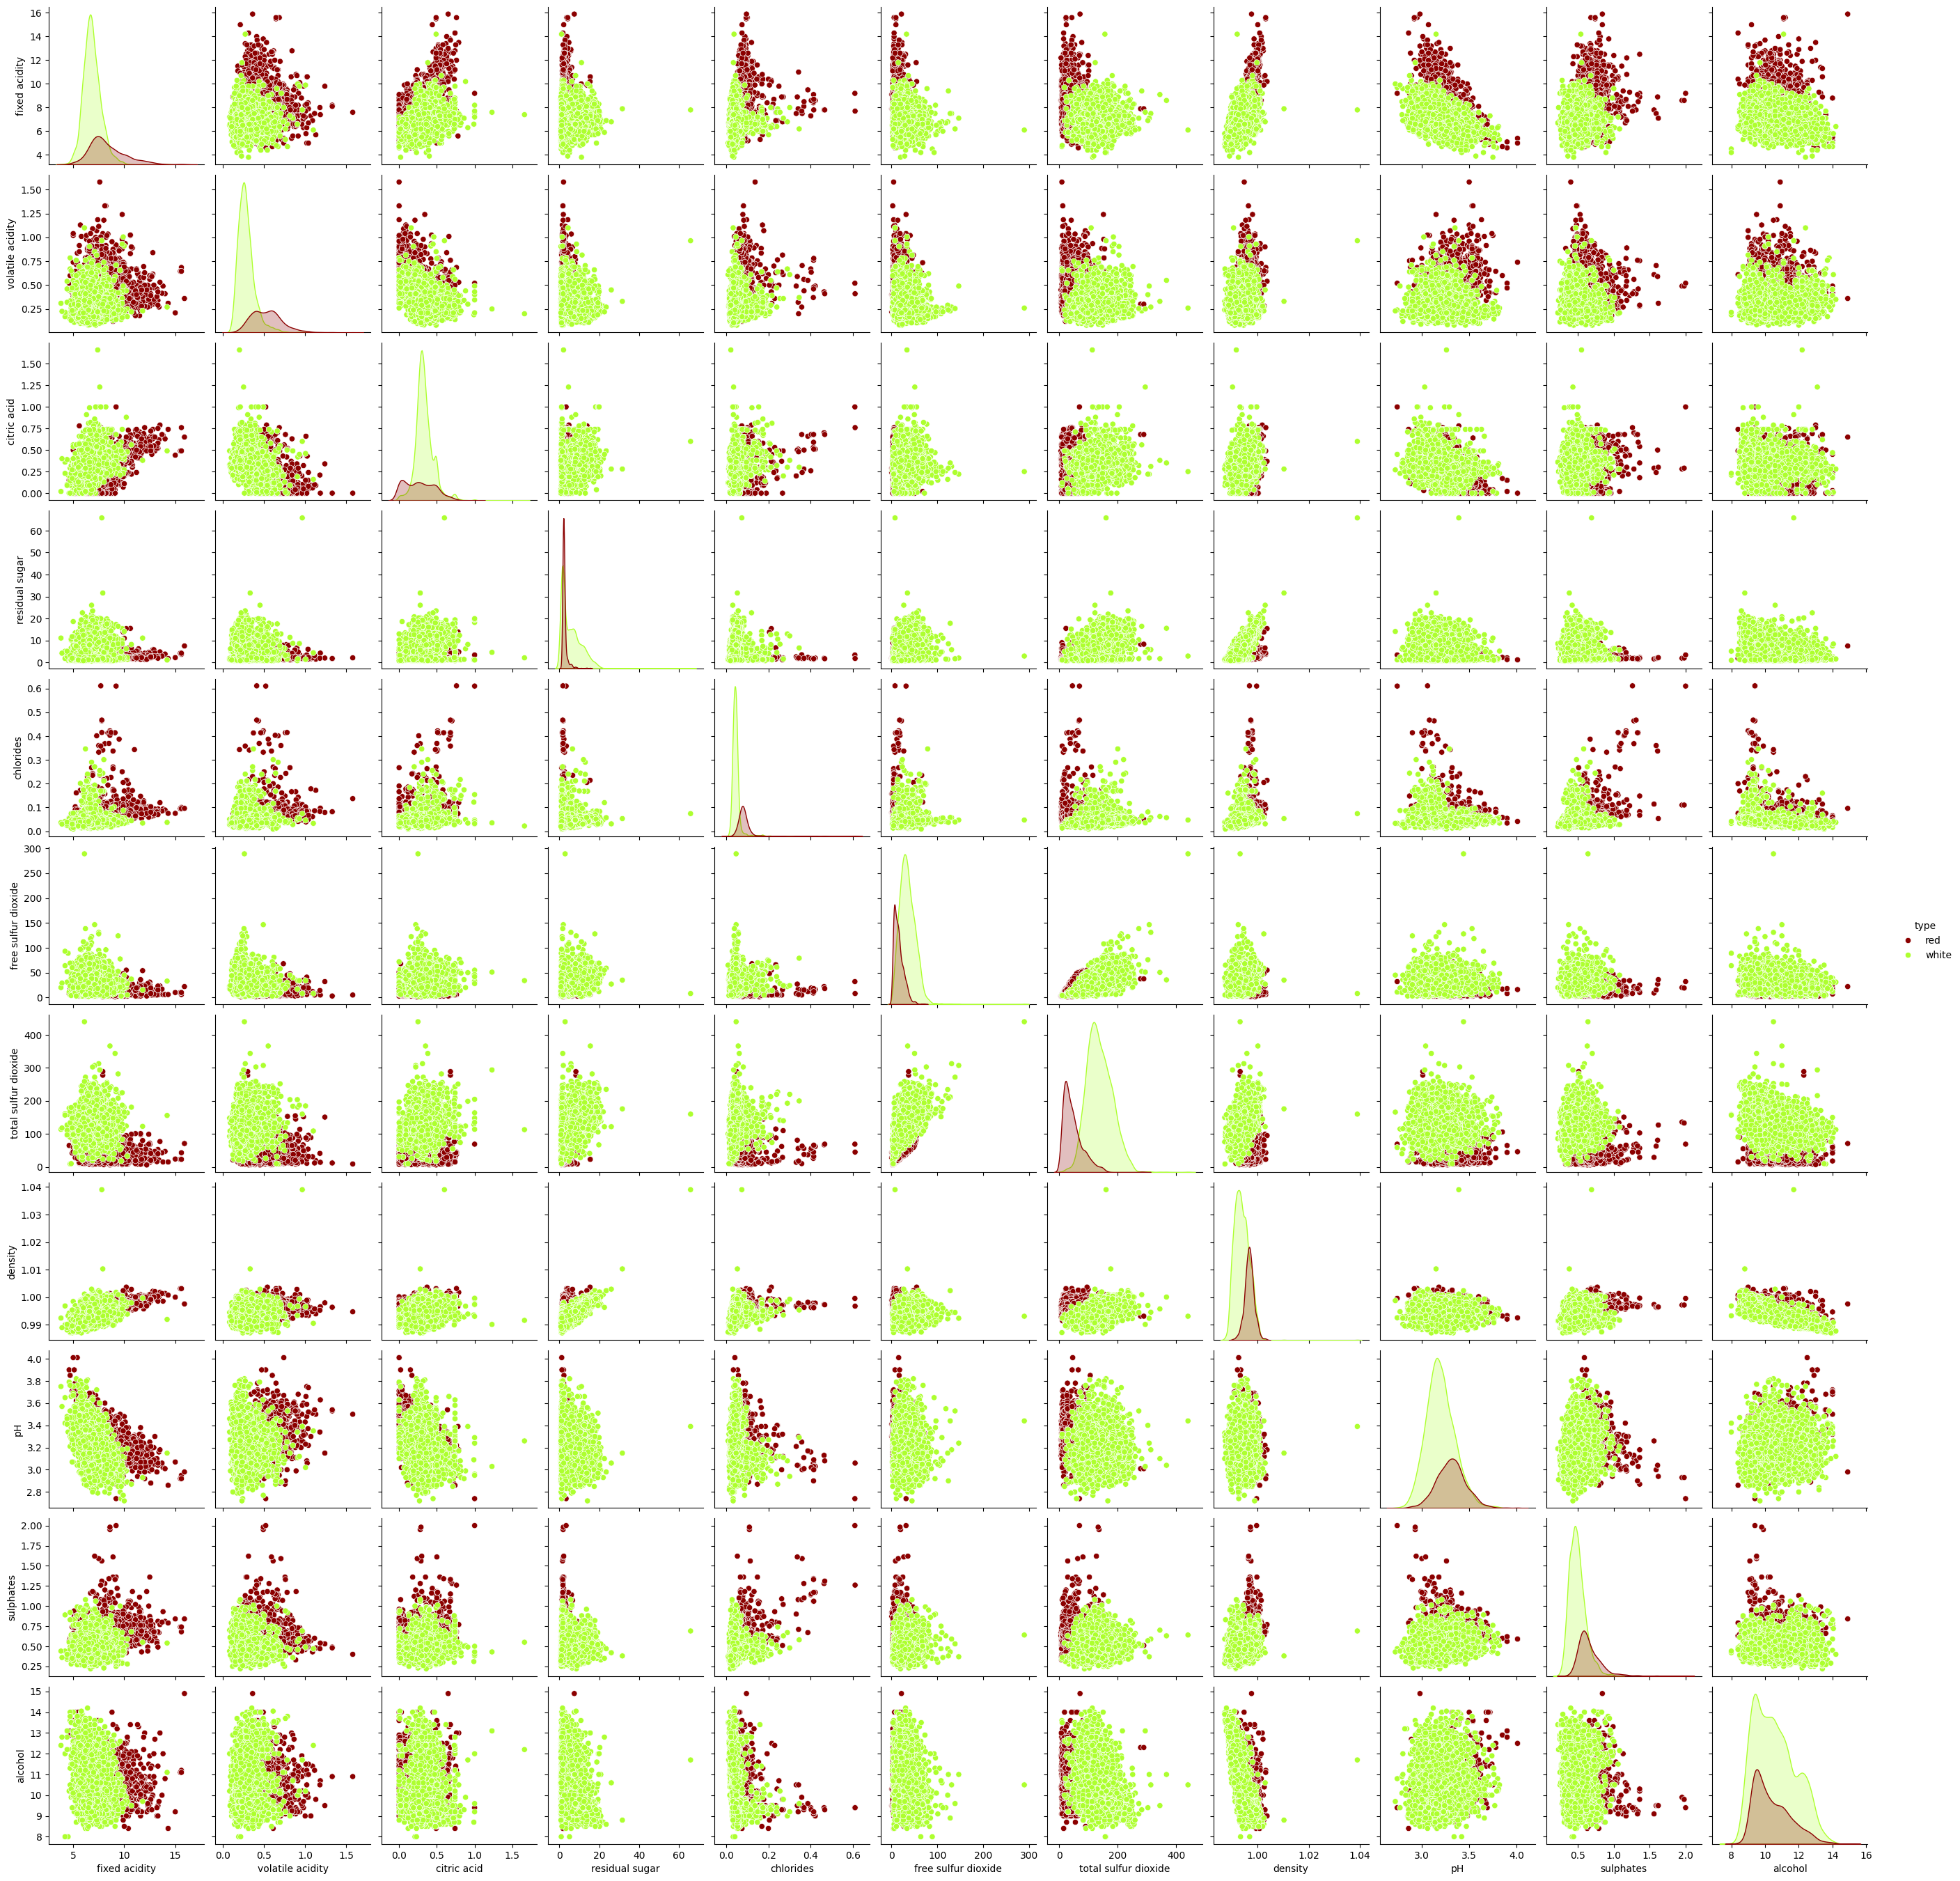

In [43]:
sns.pairplot(df, hue="type", palette={'red': 'darkred', 'white': 'greenyellow'})

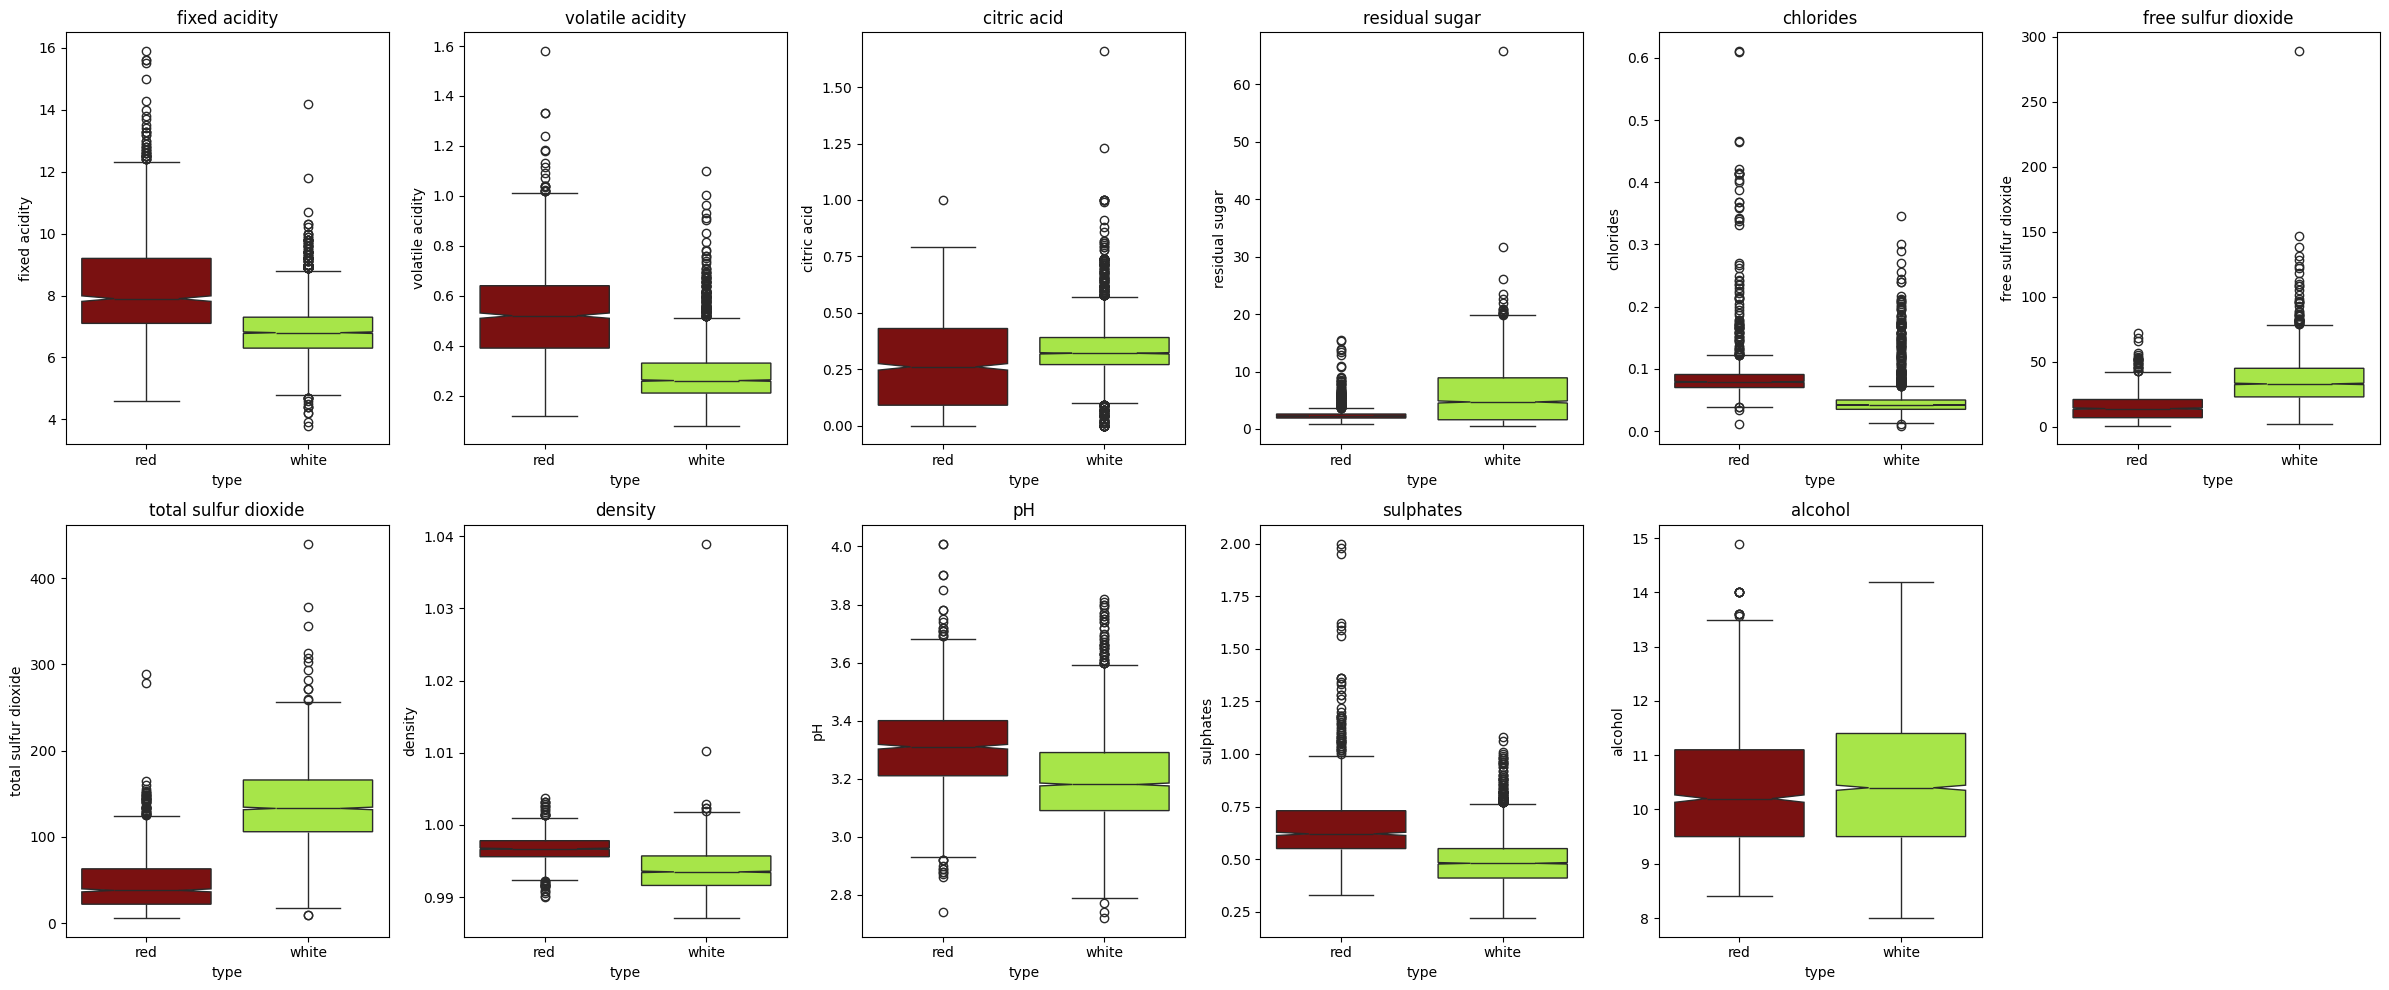

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=round(n / 2), figsize=(4 * round(n / 2), 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(ax=axes[i], x='type', y=col, data=df, notch=True, palette={'red': 'darkred', 'white': 'greenyellow'}, hue='type', legend=False)
    axes[i].set_title(col)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [45]:
# correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.214752     0.330328   
volatile acidity           0.214752          1.000000    -0.384192   
citric acid                0.330328         -0.384192     1.000000   
residual sugar            -0.104439         -0.163696     0.146189   
chlorides                  0.288918          0.367626     0.055199   
free sulfur dioxide       -0.281590         -0.349039     0.130849   
total sulfur dioxide      -0.327471         -0.400716     0.194835   
density                    0.478180          0.308452     0.094758   
pH                        -0.271182          0.246687    -0.344735   
sulphates                  0.304844          0.227772     0.059183   
alcohol                   -0.102573         -0.065411    -0.005496   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.104439   0.288918            -0.281590   
volatile acidity           -0.163696   0.367626            -0.349039   
citric acid                 0.146189   0.055199             0.130849   
residual sugar              1.000000  -0.123094             0.398717   
chlorides                  -0.123094   1.000000            -0.186615   
free sulfur dioxide         0.398717  -0.186615             1.000000   
total sulfur dioxide        0.487519  -0.269817             0.720488   
density                     0.520930   0.371867             0.006166   
pH                         -0.234522   0.025823            -0.141747   
sulphates                  -0.174717   0.405051            -0.198244   
alcohol                    -0.305242  -0.269601            -0.170012   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.327471  0.478180 -0.271182   0.304844   
volatile acidity                 -0.400716  0.308452  0.246687   0.227772   
citric acid                       0.194835  0.094758 -0.344735   0.059183   
residual sugar                    0.487519  0.520930 -0.234522  -0.174717   
chlorides                        -0.269817  0.371867  0.025823   0.405051   
free sulfur dioxide               0.720488  0.006166 -0.141747  -0.198244   
total sulfur dioxide              1.000000  0.006711 -0.222956  -0.275836   
density                           0.006711  1.000000  0.034273   0.282690   
pH                               -0.222956  0.034273  1.000000   0.168150   
sulphates                        -0.275836  0.282690  0.168150   1.000000   
alcohol                          -0.249004 -0.667811  0.097314  -0.017232   

                       alcohol  
fixed acidity        -0.102573  
volatile acidity     -0.065411  
citric acid          -0.005496  
residual sugar       -0.305242  
chlorides            -0.269601  
free sulfur dioxide  -0.170012  
total sulfur dioxide -0.249004  
density              -0.667811  
pH                    0.097314  
sulphates            -0.017232  
alcohol               1.000000

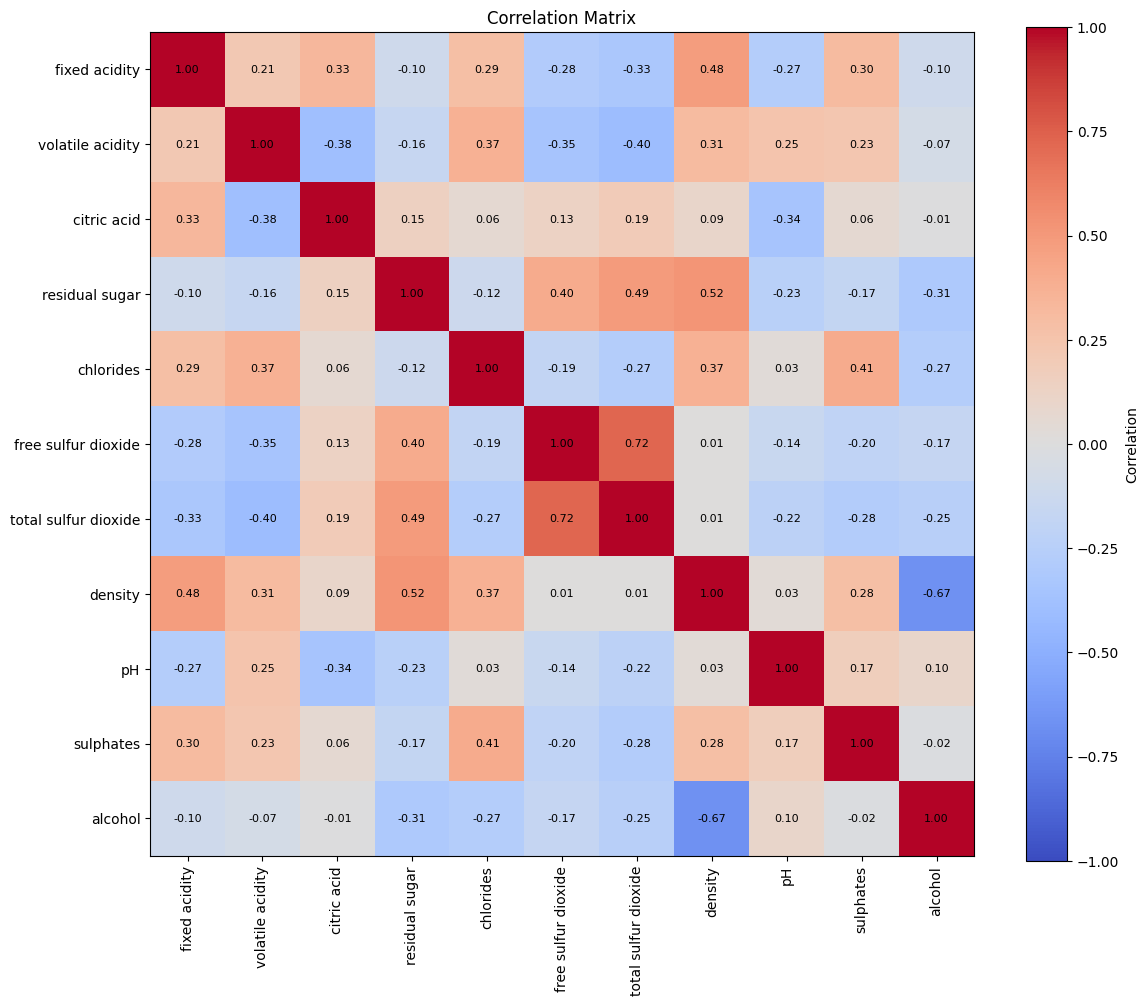

In [46]:
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)

pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(explained_variance >= 0.95) + 1
print(f"Componenti selezionate: {n_components_95}")

Componenti selezionate: 9


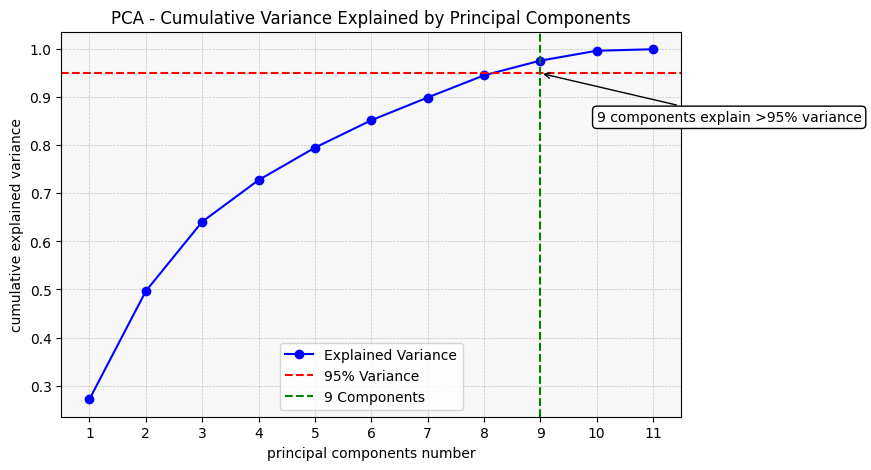

In [48]:
plt.figure(figsize=(8, 5))

plt.plot(explained_variance, marker='o', color='b', label='Explained Variance')

plt.axhline(0.95, color='r', linestyle='--', label='95% Variance')
plt.axvline(n_components_95 - 1, color='g', linestyle='--', label=f'{n_components_95} Components')
plt.xlabel('principal components number')
plt.xticks(ticks=np.arange(len(explained_variance)), labels=np.arange(1, len(explained_variance)+1))    #adjust pc ticks
plt.ylabel('cumulative explained variance')
plt.title('PCA - Cumulative Variance Explained by Principal Components')
plt.legend()

plt.annotate(f'{n_components_95} components explain >95% variance',
             xy=(n_components_95 - 1, 0.95),
             xytext=(n_components_95, 0.85),
             arrowprops=dict(color='black', arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#f7f7f7')

plt.show()

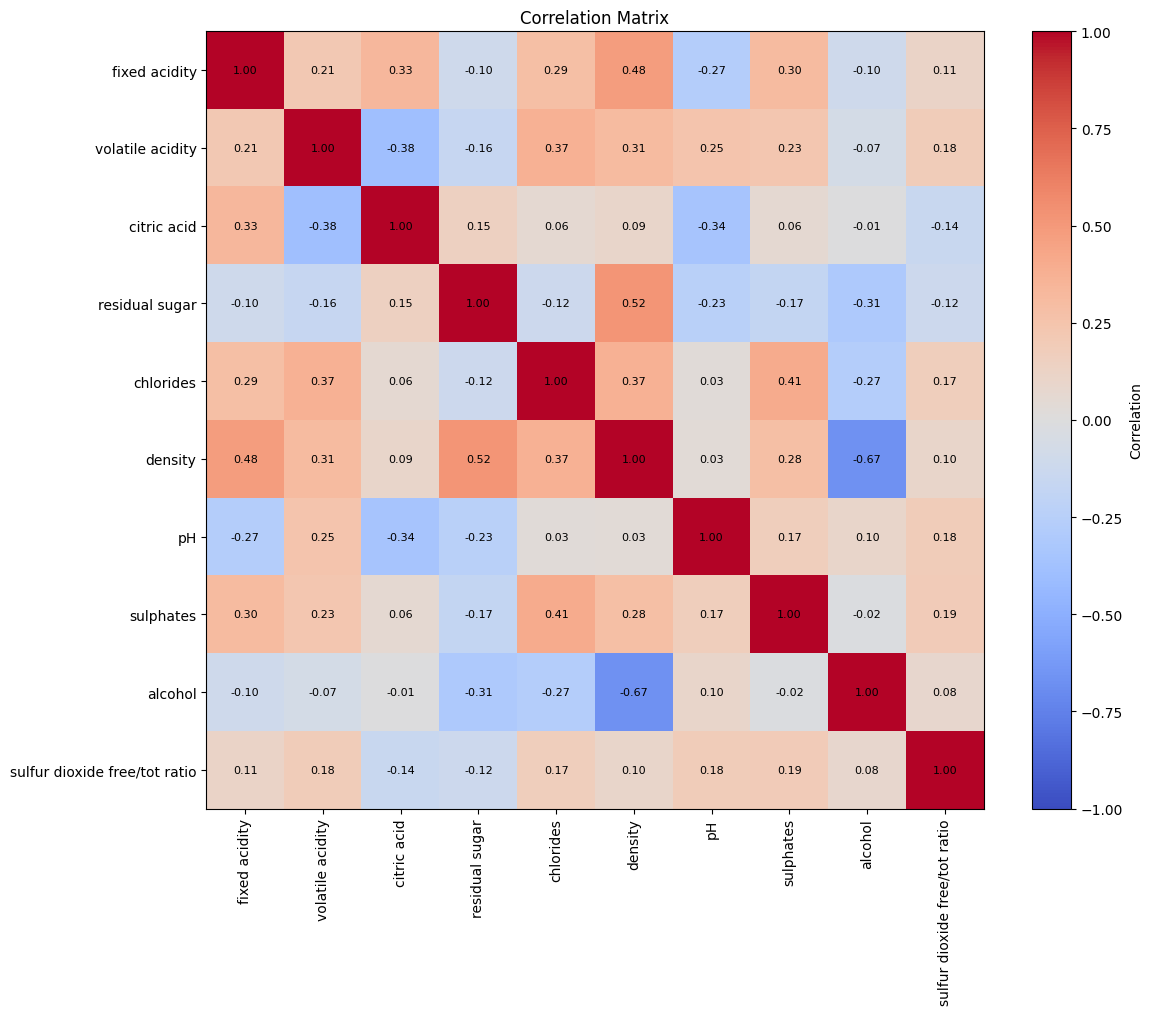

In [49]:
df2 = df.copy()
df2['sulfur dioxide free/tot ratio'] = df['free sulfur dioxide']/df['total sulfur dioxide']
df2 = df2.drop(['free sulfur dioxide'], axis=1)
df2 = df2.drop(['total sulfur dioxide'], axis=1)

corr_matrix2 = df2.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix2, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix2.columns)), corr_matrix2.columns, rotation=90)
plt.yticks(range(len(corr_matrix2.columns)), corr_matrix2.columns)
plt.title('Correlation Matrix')

for i in range(len(corr_matrix2.columns)):
    for j in range(len(corr_matrix2.columns)):
        plt.text(j, i, f'{corr_matrix2.iloc[i, j]:.2f}',
                ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

###Suddivisione del dataset in training e test set e definizione di feature e variabile target

Qui si separano i dati in variabili di input (X) e variabile di output (y).
La colonna type viene scelta come target da predire, mentre tutte le altre colonne del DataFrame vengono usate come feature del modello.
Il dataset viene diviso in 60% per l’addestramento, 20% validation e 20% per il test.


In [50]:
target = "type"
X = df2.drop(columns=[target])
y = df2[target]

X_tmp, X_test, y_tmp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=SEED,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_tmp, y_tmp,
    test_size=0.25,
    random_state=SEED,
    stratify=y_tmp
)




#Albero di decisione

## Training e validation per trovare il modello migliore

Train accuracy: 1.000
Test accuracy: 0.956


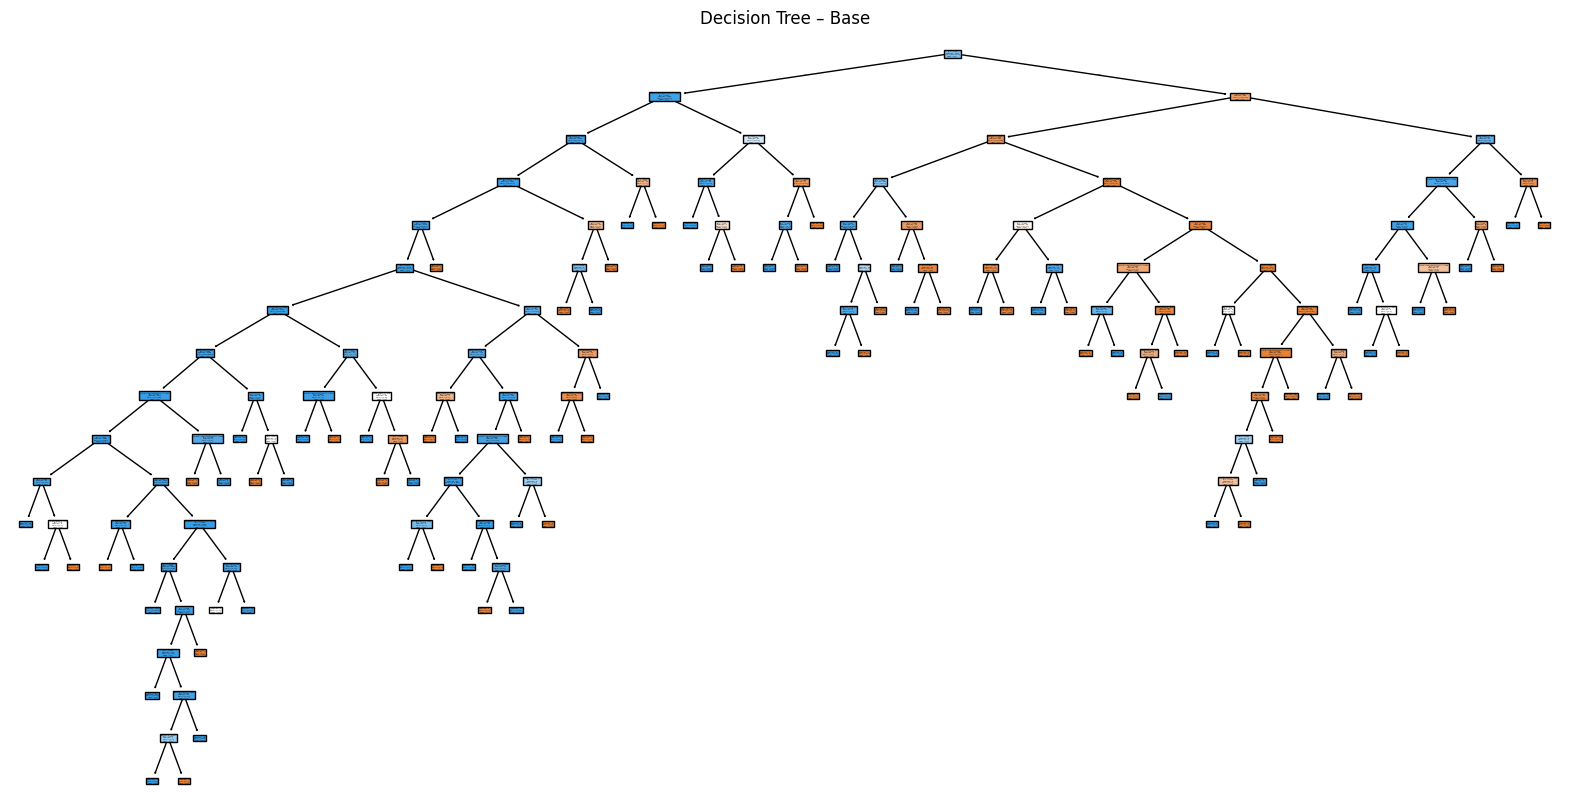

In [51]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)

train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=True,
    filled=True
)

plt.title("Decision Tree – Base")
plt.show()

In [52]:
param_grid = {
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
    "ccp_alpha": [0.0, 0.005, 0.01]
}

start_time = time()
results = []

for max_depth in param_grid["max_depth"]:
    for min_split in param_grid["min_samples_split"]:
        for min_leaf in param_grid["min_samples_leaf"]:
            for alpha in param_grid["ccp_alpha"]:

                dt = DecisionTreeClassifier(
                    criterion = "gini",
                    max_depth=max_depth,
                    min_samples_split=min_split,
                    min_samples_leaf=min_leaf,
                    ccp_alpha=alpha,
                    class_weight="balanced",
                    random_state=42
                )

                dt.fit(X_train, y_train)
                train_pred = dt.predict(X_train)
                val_pred = dt.predict(X_val)
                train_acc = accuracy_score(y_train, train_pred)
                val_acc = accuracy_score(y_val, val_pred)

                results.append({
                    "max_depth": max_depth,
                    "min_samples_split": min_split,
                    "min_samples_leaf": min_leaf,
                    "ccp_alpha": alpha,
                    "train_accuracy": train_acc,
                    "val_accuracy": val_acc,
                    "train-val_diff":train_acc - val_acc
                })


results_df = pd.DataFrame(results)
end_time = time()

print(f"Tempo di GridSearch DT: {end_time - start_time:.2f} s")

Tempo di GridSearch DT: 3.34 s


### Stampa dei vari modelli

In [53]:
best_params = results_df.sort_values(
    by="val_accuracy",
    ascending=False
).head(5)

best_params

max_depth  min_samples_split  min_samples_leaf  ccp_alpha  \
108        NaN                  2                 1        0.0   
117        NaN                  5                 1        0.0   
126        NaN                 10                 1        0.0   
114        NaN                  2                 5        0.0   
123        NaN                  5                 5        0.0   

     train_accuracy  val_accuracy  train-val_diff  
108        0.999687      0.978383        0.021303  
117        0.995301      0.976504        0.018797  
126        0.989348      0.975564        0.013784  
114        0.982456      0.974624        0.007832  
123        0.982456      0.974624        0.007832

In [54]:
best_params = results_df.sort_values(
    by="train-val_diff",
    ascending=True
).head(5)

best_params

max_depth  min_samples_split  min_samples_leaf  ccp_alpha  train_accuracy  \
0        2.0                  2                 1      0.000        0.912594   
1        2.0                  2                 1      0.005        0.912594   
2        2.0                  2                 1      0.010        0.912594   
3        2.0                  2                 3      0.000        0.912594   
4        2.0                  2                 3      0.005        0.912594   

   val_accuracy  train-val_diff  
0      0.916353       -0.003759  
1      0.916353       -0.003759  
2      0.916353       -0.003759  
3      0.916353       -0.003759  
4      0.916353       -0.003759

Prendere con differenza minima tra train e val accuracy (< 0,01), con una profondità massima > 3 con split minimo 10

In [55]:
best_params = (
    results_df[
        (results_df["train-val_diff"] < 0.01) &
        (results_df["max_depth"] > 3) &
        (results_df["min_samples_split"] >= 10)
    ]
    .sort_values(by="train-val_diff", ascending=True)
    .head(5)
)

best_params

max_depth  min_samples_split  min_samples_leaf  ccp_alpha  train_accuracy  \
75        4.0                 10                 3      0.000        0.968045   
78        4.0                 10                 5      0.000        0.968045   
73        4.0                 10                 1      0.005        0.962719   
76        4.0                 10                 3      0.005        0.962719   
79        4.0                 10                 5      0.005        0.962719   

    val_accuracy  train-val_diff  
75      0.959586        0.008459  
78      0.959586        0.008459  
73      0.953947        0.008772  
76      0.953947        0.008772  
79      0.953947        0.008772

In [56]:
best_params = best_params.iloc[0]

best_max_depth = None if pd.isna(best_params["max_depth"]) else int(best_params["max_depth"])
best_min_samples_split = int(best_params["min_samples_split"])
best_min_samples_leaf = int(best_params["min_samples_leaf"])
best_ccp_alpha = float(best_params["ccp_alpha"])

X_final = pd.concat([X_train, X_val])
y_final = pd.concat([y_train, y_val])

dt_final = DecisionTreeClassifier(
    criterion = "gini",
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    ccp_alpha=best_ccp_alpha,
    class_weight="balanced",
    random_state=42
)

start_time = time()
dt_final.fit(X_final, y_final)
end_time = time()

print(f"Tempo di training DT finale: {end_time - start_time:.2f} s")

Tempo di training DT finale: 0.02 s


###Report di classificazione

Vengono calcolate metriche più dettagliate per ciascuna classe: precision, recall e F1-score, oltre all’accuratezza generale.

- precision indica la percentuale di predizioni corrette su tutte le predizioni della classe.

- recall misura la capacità del modello di identificare tutti i casi reali della classe.

- F1-score è la media armonica di precision e recall.

- support indica quanti esempi reali di ciascuna classe sono presenti nel set di test


In [57]:
y_train_pred = dt_final.predict(X_final)
y_test_pred = dt_final.predict(X_test)

train_acc = accuracy_score(y_final, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

report = classification_report(
    y_test,
    y_test_pred,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose().round(3)

print("Classification Report (Test):")
df_report

Train Accuracy: 0.9685
Test Accuracy: 0.9511

Classification Report (Test):


precision  recall  f1-score   support
red               0.882   0.934     0.907   272.000
white             0.977   0.957     0.967   792.000
accuracy          0.951   0.951     0.951     0.951
macro avg         0.929   0.945     0.937  1064.000
weighted avg      0.953   0.951     0.952  1064.000

###Matrice di confusione del modello

La matrice di confusione mostra il numero di predizioni corrette e errate per ciascuna classe sul test set.

- La diagonale principale rappresenta le predizioni corrette.

- Gli elementi fuori diagonale rappresentano errori di classificazione.


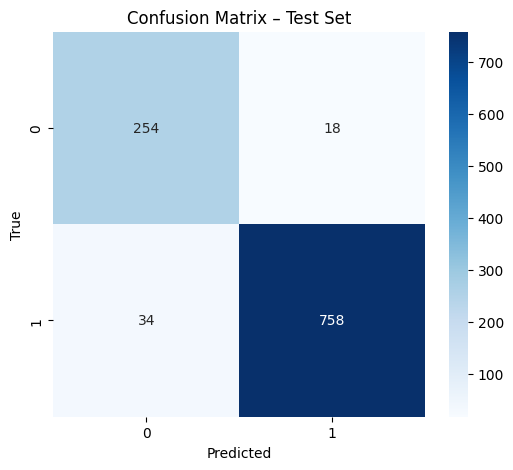

In [58]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Test Set")
plt.show()

### Calcolo della AUC

In [59]:
pos_index = list(dt_final.classes_).index('white')

y_test_prob = dt_final.predict_proba(X_test)[:, pos_index]

y_test_bin = (y_test == 'white').astype(int)
fpr_tree, tpr_tree, _ = roc_curve(y_test_bin, y_test_prob)
roc_auc_tree = roc_auc_score(y_test_bin, y_test_prob)

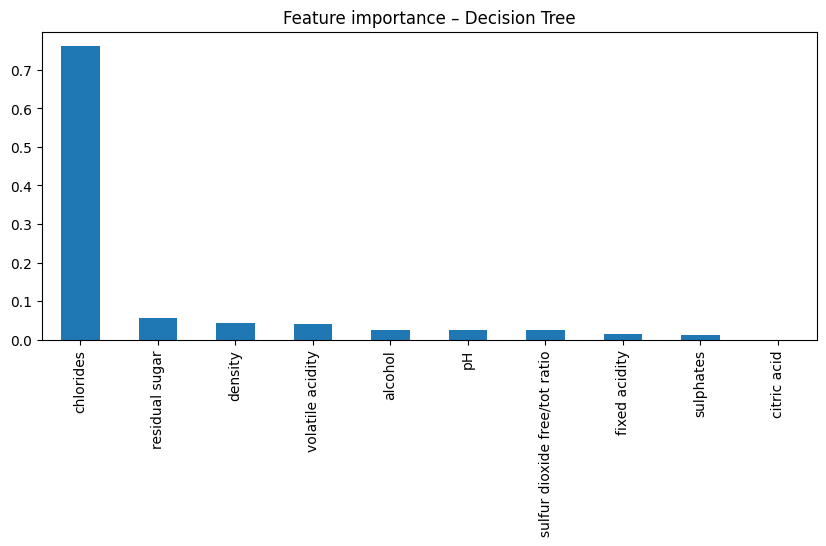

In [60]:
importances = pd.Series(
    dt_final.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.plot(kind="bar", figsize=(10,4))
plt.title("Feature importance – Decision Tree")
plt.show()

### Valutazione binaria del Decision Tree su train e test

n questo blocco si porta il problema di classificazione a una forma binaria (0/1), mappando la classe "white" a 1 e tutte le altre a 0, così da rendere coerente il calcolo delle metriche numeriche.
Si confrontano poi etichette reali e predette sia su training che su test, utilizzando tre indicatori: MSE (errore medio quadratico), accuracy (percentuale di predizioni corrette) e F1-score (bilanciamento tra precision e recall, utile in caso di classi sbilanciate).


In [61]:
y_train_bin = np.where(y_final=="white", 1, 0)
y_test_bin = np.where(y_test=="white", 1, 0)

y_train_pred_bin = np.where(y_train_pred=="white", 1, 0)
y_test_pred_bin = np.where(y_test_pred=="white", 1, 0)

pos_index = list(dt_final.classes_).index('white')

y_train_prob = dt_final.predict_proba(X_final)[:, pos_index]
y_test_prob = dt_final.predict_proba(X_test)[:, pos_index]


metrics_decision_tree = {
    "train": {
        "accuracy": accuracy_score(y_train_bin, y_train_pred_bin),
        "f1": f1_score(y_train_bin, y_train_pred_bin),
    },
    "test": {
        "accuracy": accuracy_score(y_test_bin, y_test_pred_bin),
        "f1": f1_score(y_test_bin, y_test_pred_bin),
    }
}


### Visualizzazione dell'albero

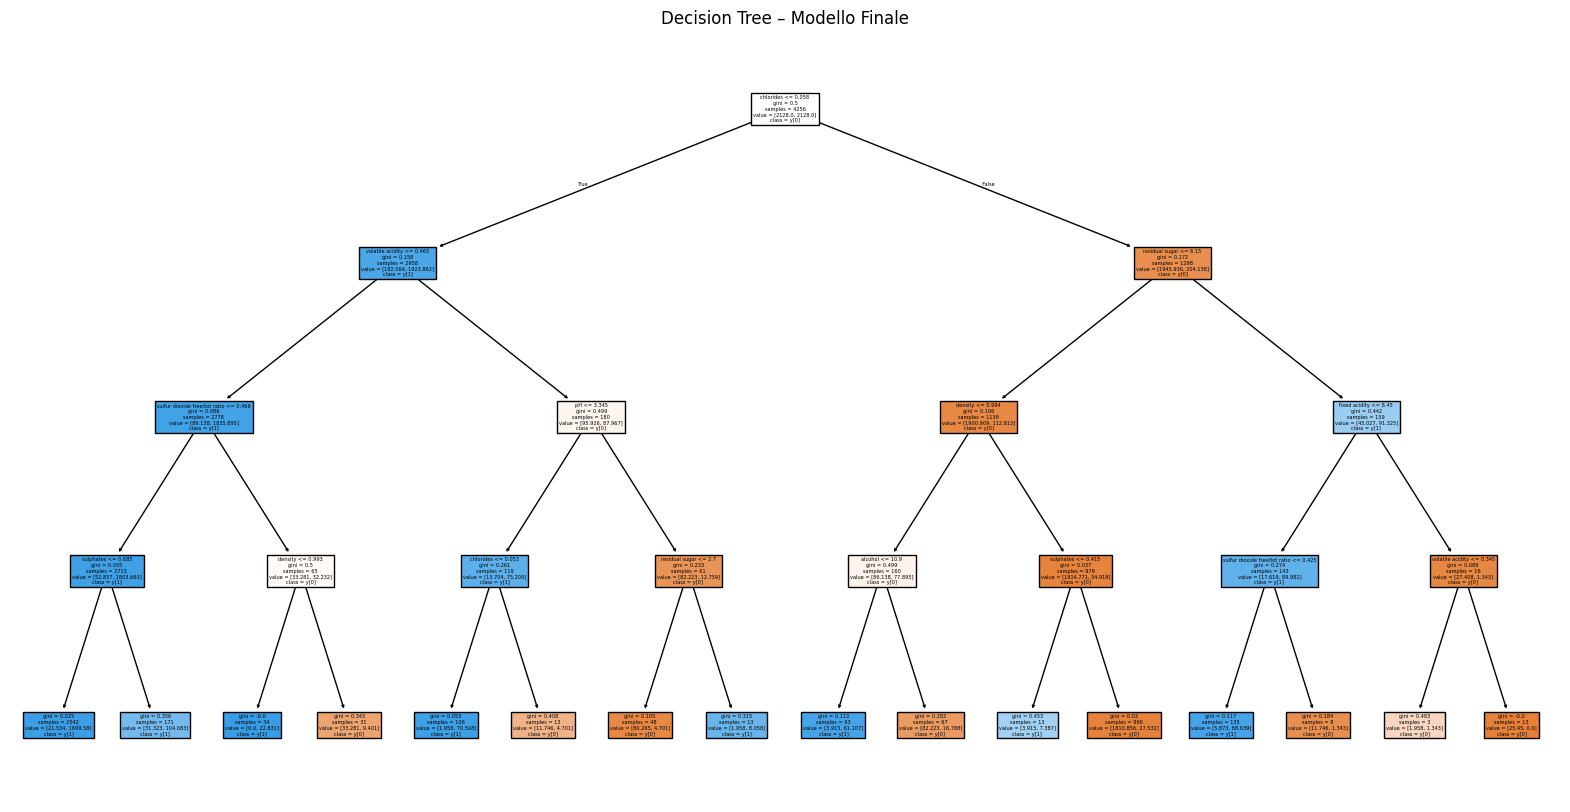

In [62]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_final,
    feature_names=X.columns,
    class_names=True,
    filled=True
)

plt.title("Decision Tree – Modello Finale")
plt.show()

#Rete Neurale (Multi-layer Perceptron)





In [63]:
le = LabelEncoder()
le.fit(y_train)

y_train_nn = le.transform(y_train)
y_val_nn   = le.transform(y_val)
y_test_nn  = le.transform(y_test)


scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train)
X_val_nn   = scaler.transform(X_val)
X_test_nn  = scaler.transform(X_test)


In [64]:
def build_model(input_dim, neurons=10, lr=0.001, num_layers=2, dropout_rate=0.2):
    """Crea una rete con un numero variabile di layer nascosti."""
    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    for i in range(num_layers):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    metrics = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc_pr', curve='PR'),
        keras.metrics.AUC(name='auc_roc', curve='ROC')
    ]

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=metrics
    )
    return model

In [65]:
def run_grid_search(X_train, y_train, X_val, y_val, params):
    results = []
    input_dim = X_train.shape[1]

    for nl in params['num_layers']:
        for n in params['neurons']:
            for lr in params['lr']:
                for b in params['batch_size']:
                    for epoch in params['epochs']:
                      for dropout_rate in params['dropout_rate']:
                        print(f"Testing: Layers={nl} | Neurons={n:2d} | LR={lr:.4f} | Batch={b:2d} | Epoch={epoch} | Dropout_rate={dropout_rate} ...")

                        model = build_model(input_dim, n, lr, nl, dropout_rate)

                        model.fit(
                            X_train, y_train,
                            epochs=epoch, batch_size=b,
                            validation_data=(X_val, y_val), verbose=0
                        )

                        metrics_dict = model.evaluate(X_val, y_val, verbose=0, return_dict=True)

                        res = {
                            'layers': nl,
                            'neurons': n,
                            'lr': lr,
                            'batch_size': b,
                            'epoch': epoch,
                            'dropout_rate': dropout_rate,
                        }

                        res.update(metrics_dict)

                        results.append(res)

    return pd.DataFrame(results)

###Grid-Search
Questa sezione può non essere eseguita in quanto la configurazione migliore è gia stata trovata al fine di risparmiare tempo nell'esecuzione del notebook, il csv con tutti i risultati è stato caricato nella cartella

In [66]:
# start_time = time()

# print("Mappatura classi:", dict(zip(le.classes_, range(len(le.classes_)))))
# print(f"Shape dei dati di training: {X_train_nn.shape}")

# hyperparams = {
#    'num_layers': [1, 2, 3, 4],
#    'neurons': [8, 10, 16, 32],
#    'lr': [0.01, 0.001, 0.0005],
#    'batch_size': [128, 32, 64],
#    'epochs': [15, 20, 30, 40, 50],
#    'dropout_rate' : [0.1, 0.2, 0.3]
# }

# df_results = run_grid_search(X_train_nn, y_train_nn, X_val_nn, y_val_nn, hyperparams)

# end_time = time()

# print(f"Tempo di training DT finale: {end_time - start_time:.2f} s")

In [67]:
# df_results = df_results.sort_values(
#     by=['recall', 'layers', 'neurons'],
#     ascending=[False, True, True]
# )

# csv_filename = 'risultati_grid_search_vini.csv'

# df_results.to_csv(csv_filename, index=False)

# print(f"File salvato correttamente come: {csv_filename}")

# from google.colab import files
# files.download(csv_filename)

### Esecuzione della rete

In [68]:
hyperparams = {
   'layers': 1,
   'neurons': 8,
   'lr': 0.01,
   'batch_size': 128,
   'epoch': 40,
   'dropout_rate' : 0.3
}

# best_config = df_results.iloc[0]

best_config = hyperparams

num_layers = int(best_config['layers'])
neurons = int(best_config['neurons'])
lr = best_config['lr']
batch_size = int(best_config['batch_size'])
epochs = int(best_config['epoch'])
dropout_rate = (best_config['dropout_rate'])


print(f"• Numero Livelli: {num_layers}")
print(f"• Neuroni: {neurons}")
print(f"• Learning Rate: {lr}")
print(f"• Batch Size: {batch_size}")
print(f"• Epoche: {epochs}")
print(f"• Dropout Rate: {dropout_rate}")


• Numero Livelli: 1
• Neuroni: 8
• Learning Rate: 0.01
• Batch Size: 128
• Epoche: 40
• Dropout Rate: 0.3


In [69]:
final_model = build_model(
    input_dim=X_train_nn.shape[1],
    num_layers=num_layers,
    neurons=neurons,
    lr=lr,
    dropout_rate=dropout_rate
)

X_train_full_nn = np.concatenate([X_train_nn, X_val_nn])
y_train_full_nn = np.concatenate([y_train_nn, y_val_nn])

history = final_model.fit(
    X_train_full_nn, y_train_full_nn,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5788 - auc_pr: 0.8453 - auc_roc: 0.6466 - loss: 0.7199 - precision: 0.8327 - recall: 0.5299
Epoch 2/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - auc_pr: 0.9928 - auc_roc: 0.9828 - loss: 0.2043 - precision: 0.9695 - recall: 0.9655
Epoch 3/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - auc_pr: 0.9948 - auc_roc: 0.9893 - loss: 0.1196 - precision: 0.9759 - recall: 0.9775
Epoch 4/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - auc_pr: 0.9961 - auc_roc: 0.9922 - loss: 0.0925 - precision: 0.9830 - recall: 0.9834
Epoch 5/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - auc_pr: 0.9965 - auc_roc: 0.9927 - loss: 0.0839 - precision: 0.9886 - recall: 0.9810
Epoch 6/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - auc_pr: 0.9967 - auc_roc: 0.9938 - loss: 0.0732 - precision: 0.9872 - recall: 0.9871
Epoch 7/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

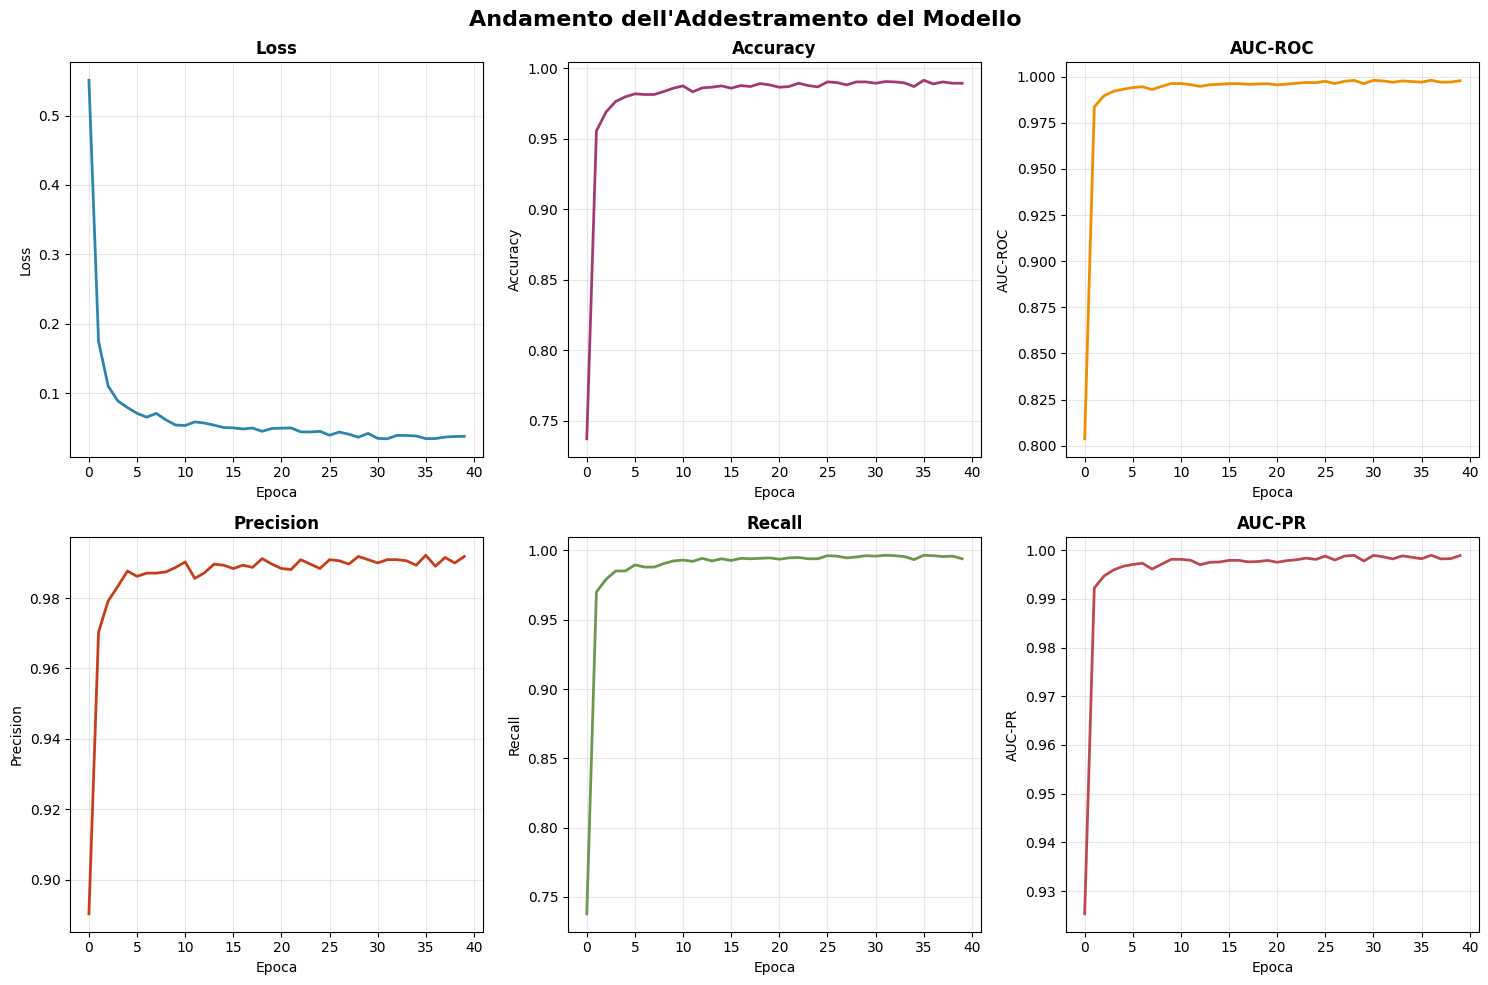

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Andamento dell\'Addestramento del Modello', fontsize=16, fontweight='bold')

axes[0, 0].plot(history.history['loss'], linewidth=2, color='#2E86AB')
axes[0, 0].set_title('Loss', fontweight='bold')
axes[0, 0].set_xlabel('Epoca')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history.history['accuracy'], linewidth=2, color='#A23B72')
axes[0, 1].set_title('Accuracy', fontweight='bold')
axes[0, 1].set_xlabel('Epoca')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(history.history['auc_roc'], linewidth=2, color='#F18F01')
axes[0, 2].set_title('AUC-ROC', fontweight='bold')
axes[0, 2].set_xlabel('Epoca')
axes[0, 2].set_ylabel('AUC-ROC')
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].plot(history.history['precision'], linewidth=2, color='#C73E1D')
axes[1, 0].set_title('Precision', fontweight='bold')
axes[1, 0].set_xlabel('Epoca')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(history.history['recall'], linewidth=2, color='#6A994E')
axes[1, 1].set_title('Recall', fontweight='bold')
axes[1, 1].set_xlabel('Epoca')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].plot(history.history['auc_pr'], linewidth=2, color='#BC4B51')
axes[1, 2].set_title('AUC-PR', fontweight='bold')
axes[1, 2].set_xlabel('Epoca')
axes[1, 2].set_ylabel('AUC-PR')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

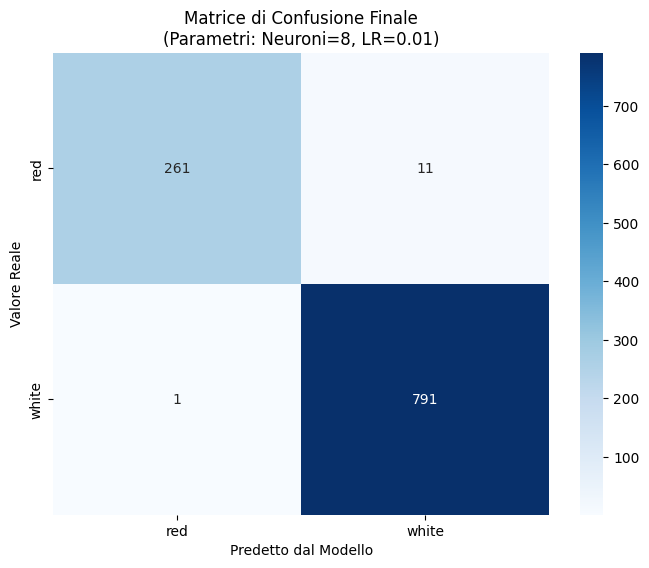


 REPORT
              precision    recall  f1-score   support

         red       1.00      0.96      0.98       272
       white       0.99      1.00      0.99       792

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.98      1064
weighted avg       0.99      0.99      0.99      1064



In [71]:
y_pred_probs = final_model.predict(X_test_nn, verbose=0)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

y_true = np.argmax(y_test_nn, axis=1) if len(y_test_nn.shape) > 1 else y_test_nn

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title(f'Matrice di Confusione Finale\n(Parametri: Neuroni={neurons}, LR={lr})')
plt.xlabel('Predetto dal Modello')
plt.ylabel('Valore Reale')
plt.show()

print("\n REPORT")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

In [72]:
from sklearn.model_selection import train_test_split
_, test_indices = train_test_split(df2.index, test_size=0.2, random_state=42)

risultati = df2.loc[test_indices].copy()
risultati['Reale'] = le.inverse_transform(y_true)
risultati['Predetto'] = le.inverse_transform(y_pred_classes)

vini_sbagliati = risultati[risultati['Reale'] != risultati['Predetto']]

features = [col for col in df2.columns if col != 'type']
medie_classi = df2.groupby('type').mean()
std_classi = df2.groupby('type').std()

print(f"Analisi: {len(features)} variabili per {len(vini_sbagliati)} errori.")

analisi_scostamento = []
for idx, row in vini_sbagliati.iterrows():
    classe_reale = row['Reale']
    report_vino = {'Index': idx, 'Reale': classe_reale, 'Predetto': row['Predetto']}

    for f in features:
        scostamento = (row[f] - medie_classi.loc[classe_reale, f]) / std_classi.loc[classe_reale, f]
        report_vino[f] = round(scostamento, 2)

    analisi_scostamento.append(report_vino)

df_scostamento = pd.DataFrame(analisi_scostamento).set_index('Index')
display(df_scostamento)

Analisi: 10 variabili per 12 errori.


Reale Predetto  fixed acidity  volatile acidity  citric acid  \
Index                                                                 
6230     red    white          -0.98             -1.75         0.60   
4376     red    white          -0.41             -1.80         0.45   
2415     red    white           0.05             -1.91         0.76   
1938     red    white          -0.98             -1.91         0.40   
5691     red    white          -1.10             -0.16        -0.37   
4456     red    white          -0.98             -1.31         0.19   
4814     red    white          -0.70             -2.13         0.29   
4083   white      red          -0.51              0.19        -1.42   
5452     red    white          -0.98             -1.14        -0.06   
2146     red    white          -0.35             -1.69         0.76   
1814     red    white          -1.45             -1.47        -0.17   
824      red    white          -0.70             -0.27         0.04   

       residual sugar  chlorides  density    pH  sulphates  alcohol  \
Index                                                                 
6230            -0.17      -0.95    -2.41 -0.58      -0.46     0.43   
4376            -0.46      -0.91    -2.32 -0.13      -0.70     0.80   
2415             1.91      -1.06    -1.50 -0.97      -0.81     1.17   
1938            -0.76      -0.79    -1.77  0.78       1.12    -0.21   
5691            -0.09      -0.59    -1.91 -0.84      -1.52    -1.14   
4456             1.02      -1.24    -3.40 -0.45      -0.34     2.00   
4814            -1.13       0.32    -3.28 -0.77      -0.11     0.99   
4083             0.33       0.18     0.73 -0.17      -0.00    -1.31   
5452             1.54      -1.16    -2.53  0.58       0.42     1.91   
2146            -0.46      -0.73    -2.41 -0.06      -0.99     1.26   
1814             4.94      -0.89    -0.33  0.00      -1.63    -0.95   
824              0.20      -0.41     0.06 -0.45      -0.75    -0.12   

       sulfur dioxide free/tot ratio  
Index                                 
6230                           -0.50  
4376                           -1.07  
2415                           -1.88  
1938                           -0.22  
5691                           -1.37  
4456                            0.16  
4814                           -0.07  
4083                            0.35  
5452                           -1.07  
2146                           -1.72  
1814                           -0.13  
824                            -0.04

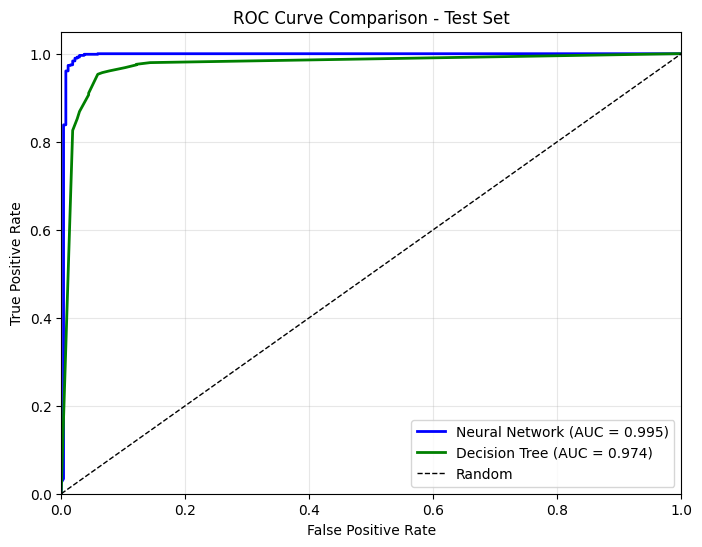

In [73]:
y_pred_probs = final_model.predict(X_test_nn, verbose=0)

pos_class_index = 1
y_score_nn = y_pred_probs.flatten()
y_true_nn = y_test_nn.flatten()


fpr_nn, tpr_nn, _ = roc_curve(y_true_nn, y_score_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

#  Plot
plt.figure(figsize=(8, 6))


plt.plot(fpr_nn, tpr_nn, color='blue', lw=2,
         label=f'Neural Network (AUC = {roc_auc_nn:.3f})')

plt.plot(fpr_tree, tpr_tree, color='green', lw=2,
         label=f'Decision Tree (AUC = {roc_auc_tree:.3f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', label='Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Test Set')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.show()